In [1]:
# Vizuelna podešavanja okruženja (samo razvuče notebook na širinu ekrana)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [48]:
import pandas as pd
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
with open("data_cleaned/day_routes",'rb') as file:
    dataDayRoutes=pickle.load(file)
with open("data_cleaned/routes", 'rb') as file:
    dataRoutes = pickle.load(file)
with open("data_cleaned/stops", 'rb') as file:
    dataStops = pickle.load(file)
with open("data_cleaned/trips", 'rb') as file:
    dataTrips = pickle.load(file)

with open("data_cleaned/stop_times", 'rb') as file:
    dataStopTimes = pickle.load(file)
with open("data_cleaned/stop_times2", 'rb') as file:
    dataStopTimes2 = pickle.load(file)
with open("data_cleaned/dataStopsExtra", 'rb') as file:
    dataStopsExtra = pickle.load(file)
#dataRoutes=dataRoutes[dataRoutes['route_type']!=702]
print(dataStopsExtra)

      stop_id                                stop_name  types          tip  \
0           1                  Kalemegdan (Donji Grad)      1   tramvajska   
1           2                         Tadeuša Košćuška      1   tramvajska   
2           3                         Tadeuša Košćuška      1   tramvajska   
3           4                               Kalemegdan      1   tramvajska   
4           5                               Kalemegdan      1   tramvajska   
5           6                              Pristanište      1   tramvajska   
6           7                              Pristanište      1   tramvajska   
7           8                             Brankov Most      1   tramvajska   
8           9                             Brankov Most      1   tramvajska   
9          10                       Ekonomski Fakultet      3     mesovita   
10         11                       Ekonomski Fakultet      1   tramvajska   
11         14                            Palata Pravde      1   

In [49]:
data=dataStopTimes2.merge(dataTrips)

data=data[['stop_id','stop_sequence','route_id','direction_id']]
data1=data[data['direction_id']==0]
data2=data[data['direction_id']==1]

data1=data1.groupby(['stop_id','stop_sequence','route_id'],as_index=False).first()
data1=data1.sort_values(by=['route_id','stop_sequence'])
data2=data2.groupby(['stop_id','stop_sequence','route_id'],as_index=False).first()
data2=data2.sort_values(by=['route_id','stop_sequence'])
dataStopSequences=pd.concat([data1, data2], sort=False)
dataDayRoutesMerge=dataDayRoutes['route_id']
dataStopSequences= dataStopSequences.merge(dataDayRoutesMerge)
Stops=dataStopSequences.groupby(['stop_id'],as_index=False).first()
Stops= Stops[['stop_id']]
print(Stops)
print(dataStopSequences)

      stop_id
0           1
1           2
2           3
3           4
4           5
5           6
6           7
7           8
8           9
9          10
10         11
11         14
12         15
13         16
14         17
15         18
16         19
17         20
18         21
19         22
20         23
21         52
22         53
23         54
24         55
25         56
26         57
27         58
28         59
29         60
30         61
31         62
32         63
33         64
34         65
35         66
36         67
37         68
38         69
39         70
40         71
41         72
42         73
43         74
44         75
45         76
46         77
47         78
48         79
49         80
50         81
51         82
52         83
53         84
54         85
55         86
56         87
57         88
58         89
59         90
60         91
61         92
62         93
63         94
64         95
65         96
66         97
67         98
68         99
69        100
70    

In [50]:
print(dataDayRoutes)
G = nx.Graph()
data=dataDayRoutes[['route_id','route_short_name','route_long_name','route_type']]
for i in range(0,data.shape[0]):
        G.add_node(data.iloc[i]['route_id'],name=data.iloc[i]['route_short_name'],longName=data.iloc[i]['route_long_name'],tip=data.iloc[i]['route_type'])


#print(data)
#print(dataStops.groupby(['stop_id','stop_name']).
#for i in range(0,data.shape[0]):

     route_id route_short_name  \
0           2                2   
1           5                5   
2           6                6   
3           7                7   
4           9                9   
5          10               10   
6          11               11   
7          12               12   
8          14               14   
9          15               15   
10         16               16   
11         17               17   
12         18               18   
13         20               20   
14         23               23   
15         24               24   
16         25               25   
17         26               26   
18         27               27   
19         28               28   
20         30               30   
21         31               31   
22         32               32   
23         33               33   
24         34               34   
25         35               35   
26         36               36   
27         37               37   
28         38 

In [52]:
for stop in range (0,Stops.shape[0]):
    
    stop_id=Stops.iloc[stop]['stop_id']
    tmp=dataStopSequences[dataStopSequences['stop_id']==stop_id]
    #print(tmp)
    for i in range(0,tmp.shape[0]):
        for j in range(i+1,tmp.shape[0]):
            if (tmp.iloc[i]['route_id']!=tmp.iloc[j]['route_id']):
                if((tmp.iloc[i]['route_id'], tmp.iloc[j]['route_id']) in G.edges):
                     G.edges[tmp.iloc[i]['route_id'], tmp.iloc[j]['route_id']]['weight']+=1
                else:
                    G.add_edge(tmp.iloc[i]['route_id'], tmp.iloc[j]['route_id'],weight=1)
print(G)

3116
Graph with 173 nodes and 1833 edges


In [8]:

print(nx.number_connected_components(G))
print(nx.edge_connectivity(G))

1
1


In [19]:
#gustina dijametar i prosecno rastojanje mreze
print(nx.density(G))
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(diameter)
#print(nx.diameter(G))
print(nx.average_shortest_path_length(G))

0.12320204328538782
6
2.3267912353810996


In [10]:
pd.set_option('display.max_rows', 10)
#KLASTERIZACIJA
n = G.number_of_nodes()
m = G.number_of_edges()
Gnm = nx.gnm_random_graph(n, m) 
p = ( 2*float(m) ) / ( n* (n-1) )
print(p)

er_mreza = nx.erdos_renyi_graph(n,p)

delta_m = m - er_mreza.number_of_edges()
print(f"Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

print('PModel')
id_stanice, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G,weight = "weight")

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)

print('GNMModel')
id_stanice, clustering_coef = zip(*nx.clustering(Gnm, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(Gnm)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print('ERModel')
id_stanice, clustering_coef = zip(*nx.clustering(er_mreza, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(er_mreza)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)



0.12320204328538782
Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi 77, što je odstupanje od 4.20076377523186%
PModel
Max lokalni cc: 0.22715171506199905
Prosečan cc: 0.08210298469722285
Lokalni stepeni klasterisanja koji nisu nula:
        id        cc
13      20  0.020488
40      50  0.023243
152  10038  0.023604
168  40101  0.023631
169  40102  0.024998
..     ...       ...
89     302  0.221345
90     303  0.221345
86     109  0.225270
84     107  0.225270
103    404  0.227152

[170 rows x 2 columns]
GNMModel
Max lokalni cc: 0.2545454545454545
Prosečan cc: 0.12452725518311186
Lokalni stepeni klasterisanja koji nisu nula:
      id        cc
40    40  0.066667
131  131  0.070175
58    58  0.073684
107  107  0.075758
23    23  0.077922
..   ...       ...
87    87  0.181818
52    52  0.186813
99    99  0.186813
6      6  0.189723
60    60  0.254545

[173 rows x 2 columns]
ERModel
Max lokalni cc: 0.20952380952380953
Prosečan cc: 0.11942309819297968
Lokalni stepeni klas

0
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0005268703898842, 4: 1.0042872454448017, 5: 1.004310344827586, 6: 1.0043525571273122, 7: 1.004369197160022, 8: 1.0044272274488102, 9: 1.0050055617352616, 10: 1.0062857142857142, 11: 1.0142348754448398, 12: 1.0318066157760815, 13: 1.0437121721587088, 14: 1.0604515659140568, 15: 1.069168506254599, 16: 1.0858059342421813, 17: 1.0870279146141215, 18: 1.1119068934646374, 19: 1.124157844080847, 20: 1.1295180722891567, 21: 1.1177117711771178, 22: 1.1140776699029127, 23: 1.1162483487450463, 24: 1.1295264623955432, 25: 1.1308677098150781, 26: 1.164179104477612, 27: 1.1482889733840305, 28: 1.127310061601643, 29: 1.109619686800895, 30: 1.1327433628318584, 31: 1.1316725978647686, 32: 1.1492537313432836, 33: 1.1373390557939913, 34: 1.1479289940828403, 35: 1.1328125, 36: 1.1192660550458715, 37: 1.1111111111111112, 38: 1.1886792452830188, 39: 1.3157894736842106, 40: 1.3157894736842106, 41: 1.3749999999999998, 42: 1.3749999999999998, 43: 1.3749999999999998, 44: 1.374999

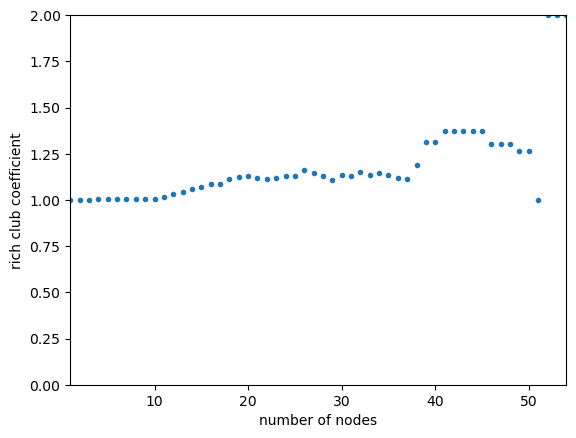

In [44]:
print(nx.number_of_selfloops(G))
rich=nx.rich_club_coefficient(G.to_undirected(), normalized=True, Q=100, seed=None)
print(rich)

x, y = zip(*rich.items())                                                      

plt.figure(1)   

    # prep axes   
plt.xlabel('number of nodes')                                                                                                             
plt.xscale('linear')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('rich club coefficient')                                                                                                          
plt.yscale('linear')                                                                                                                
plt.ylim(0, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

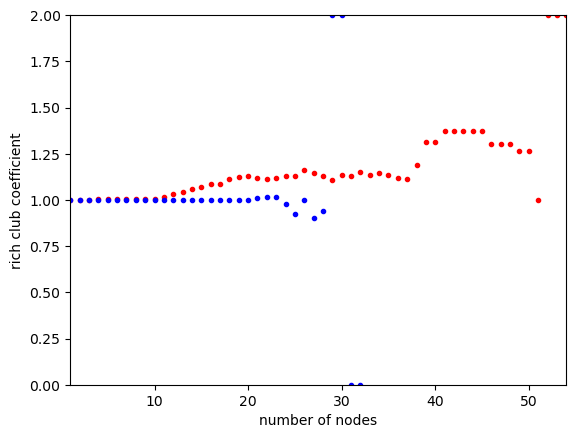

In [48]:
rich2=nx.rich_club_coefficient(er_mreza,normalized=True,Q=80,seed=None)
x, y = zip(*rich.items())                                                      
x1,y1=zip(*rich2.items())
plt.figure(1)   

    # prep axes   
plt.xlabel('number of nodes')                                                                                                             
plt.xscale('linear')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('rich club coefficient')                                                                                                          
plt.yscale('linear')                                                                                                                
plt.ylim(0, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.',color='r')    
plt.scatter(x1, y1, marker='.',color='b')                                                                                                      
plt.show()

In [32]:
#Asortativnost
#netezinska
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.13508712491169486
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.053720195507813144


Text(0.5, 1.0, 'cModel')

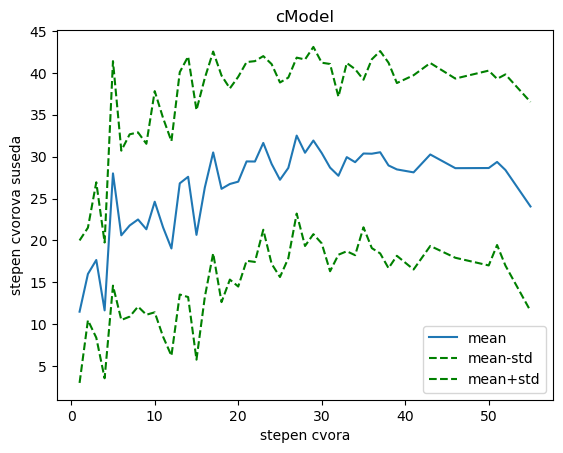

In [62]:
dict_degree = {}
for node in G.nodes():
    
    w = G.degree(nbunch= node)
    G.neighbors(node)
    for neigh_node in G.neighbors(node):
        if w in dict_degree:
            dict_degree[w].append(G.degree(neigh_node))
        else:
            dict_degree[w] = [G.degree(neigh_node)]

d = []
for k in dict_degree:
    m = np.array(dict_degree[k]).mean()
    s = np.array(dict_degree[k]).std()
    d.append([k, m, s])
d = np.array(d)

index = np.argsort(d[:, 0])
d[:, 0] = d[index, 0]
d[:, 1] = d[index, 1]
d[:, 2] = d[index, 2]

plt.plot(d[:, 0], d[:, 1], label='mean')
plt.plot(d[:, 0], d[:, 1] - d[:, 2], linestyle='--', color='g', label = 'mean-std')
plt.plot(d[:, 0], d[:, 1] + d[:, 2], linestyle='--', color = 'g', label='mean+std')
plt.legend()
plt.xlabel('stepen cvora')
plt.ylabel('stepen cvorova suseda')
plt.title('cModel')

In [31]:
#funkcija za iscrtavanje grafa raspodele cvorova po stepenu
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({12: 10, 14: 9, 21: 8, 4: 8, 18: 7, 26: 7, 22: 7, 16: 7, 13: 7, 30: 6, 34: 6, 11: 6, 23: 5, 19: 5, 10: 5, 38: 5, 20: 4, 27: 4, 28: 3, 37: 3, 29: 3, 33: 3, 31: 3, 46: 3, 8: 3, 51: 3, 6: 3, 9: 2, 7: 2, 39: 2, 15: 2, 36: 2, 35: 2, 17: 2, 5: 2, 2: 2, 3: 2, 1: 2, 43: 1, 50: 1, 25: 1, 52: 1, 41: 1, 55: 1, 32: 1, 24: 1})


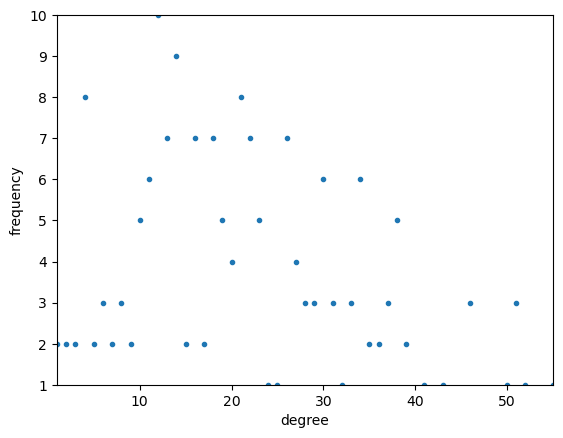

[(2, 18), (5, 20), (6, 9), (7, 21), (9, 26), (10, 22), (11, 7), (12, 28), (14, 23), (15, 26), (16, 43), (17, 39), (18, 37), (20, 21), (23, 50), (24, 15), (25, 19), (26, 19), (27, 22), (28, 10), (30, 16), (31, 25), (32, 14), (33, 29), (34, 14), (35, 30), (36, 34), (37, 52), (38, 9), (39, 19), (40, 34), (41, 36), (42, 30), (43, 14), (44, 20), (45, 33), (46, 34), (47, 38), (48, 41), (49, 33), (50, 55), (51, 31), (52, 38), (53, 38), (54, 22), (55, 30), (56, 37), (57, 14), (58, 46), (59, 34), (60, 23), (64, 18), (65, 39), (66, 8), (67, 27), (68, 35), (70, 21), (71, 34), (72, 35), (73, 34), (74, 46), (75, 28), (76, 27), (77, 33), (78, 51), (79, 19), (81, 18), (82, 30), (83, 46), (84, 27), (85, 51), (87, 22), (88, 51), (89, 37), (91, 22), (92, 23), (94, 38), (95, 38), (96, 18), (101, 15), (102, 4), (104, 11), (105, 10), (106, 11), (107, 4), (108, 6), (109, 4), (110, 4), (202, 14), (302, 12), (303, 12), (304, 12), (305, 12), (306, 12), (307, 12), (308, 16), (309, 16), (310, 14), (311, 12), (31

In [33]:
from collections import Counter
from operator import itemgetter
plot_deg_frequency(G,xscale='linear', yscale='linear')
print(G.degree())

Counter({216: 3, 268: 3, 251: 3, 163: 3, 95: 2, 184: 2, 205: 2, 367: 2, 68: 2, 91: 2, 215: 2, 140: 2, 225: 2, 298: 2, 150: 2, 252: 2, 209: 2, 144: 2, 115: 2, 208: 2, 171: 2, 50: 2, 58: 2, 104: 2, 235: 2, 117: 2, 11: 2, 13: 2, 159: 2, 54: 2, 72: 2, 93: 1, 155: 1, 85: 1, 193: 1, 178: 1, 196: 1, 109: 1, 73: 1, 179: 1, 121: 1, 63: 1, 84: 1, 96: 1, 137: 1, 195: 1, 79: 1, 143: 1, 378: 1, 33: 1, 158: 1, 181: 1, 103: 1, 77: 1, 352: 1, 204: 1, 277: 1, 267: 1, 222: 1, 70: 1, 368: 1, 333: 1, 46: 1, 236: 1, 62: 1, 126: 1, 139: 1, 317: 1, 394: 1, 306: 1, 218: 1, 359: 1, 369: 1, 90: 1, 398: 1, 202: 1, 113: 1, 328: 1, 180: 1, 168: 1, 128: 1, 145: 1, 136: 1, 8: 1, 221: 1, 224: 1, 129: 1, 37: 1, 220: 1, 9: 1, 357: 1, 339: 1, 55: 1, 318: 1, 250: 1, 273: 1, 172: 1, 105: 1, 123: 1, 260: 1, 23: 1, 66: 1, 102: 1, 52: 1, 82: 1, 88: 1, 75: 1, 76: 1, 98: 1, 332: 1, 64: 1, 165: 1, 223: 1, 234: 1, 25: 1, 403: 1, 160: 1, 177: 1, 118: 1, 51: 1, 147: 1, 174: 1, 34: 1, 279: 1, 149: 1, 69: 1, 108: 1, 94: 1, 40: 1, 6:

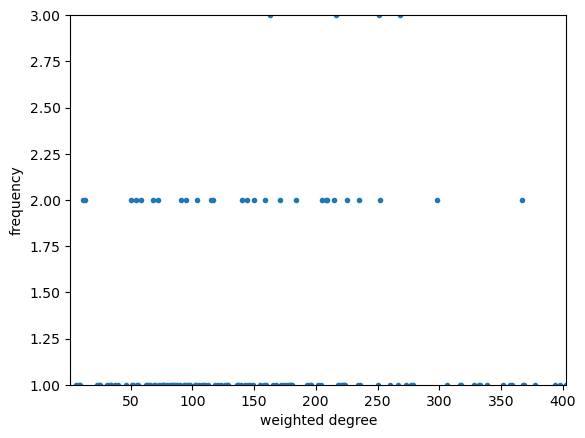

[(2, 93), (5, 155), (6, 85), (7, 193), (9, 216), (10, 178), (11, 95), (12, 184), (14, 196), (15, 109), (16, 268), (17, 251), (18, 205), (20, 73), (23, 367), (24, 68), (25, 179), (26, 91), (27, 121), (28, 63), (30, 84), (31, 96), (32, 137), (33, 195), (34, 79), (35, 205), (36, 143), (37, 378), (38, 33), (39, 158), (40, 216), (41, 181), (42, 215), (43, 103), (44, 77), (45, 215), (46, 140), (47, 352), (48, 225), (49, 204), (50, 277), (51, 298), (52, 267), (53, 268), (54, 150), (55, 222), (56, 252), (57, 70), (58, 368), (59, 333), (60, 68), (64, 46), (65, 236), (66, 62), (67, 126), (68, 139), (70, 184), (71, 163), (72, 317), (73, 394), (74, 306), (75, 218), (76, 209), (77, 209), (78, 359), (79, 144), (81, 115), (82, 208), (83, 252), (84, 171), (85, 369), (87, 90), (88, 398), (89, 202), (91, 113), (92, 115), (94, 367), (95, 328), (96, 180), (101, 168), (102, 50), (104, 128), (105, 145), (106, 136), (107, 58), (108, 8), (109, 58), (110, 50), (202, 104), (302, 235), (303, 235), (304, 225), (3

In [34]:
plot_deg_frequency(G,weighted=True,xscale='linear',yscale='linear')
print(G.degree(weight='weight'))

In [85]:
#funkcija za izracunavanje centralnosti
def calculate_centralities(G):
  
 
    CC_dict = nx.closeness_centrality(G)
    BC_dict = nx.betweenness_centrality(G)
    EVC_dict = nx.eigenvector_centrality(G,weight='weight')
    DC_dict= nx.degree_centrality(G)

    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df5=pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df = pd.concat([df2, df3, df4,df5], axis=1)
 
    #df['stop_id'] = data.index
    df=df.reset_index()
    df=df.rename(columns = {'index':'route_id'})
    df= df.merge(dataDayRoutes)
    df= df[['route_id','route_short_name','CC','BC','EVC','DC']]
    return df

In [86]:
import scipy.stats as stats
data=calculate_centralities(G)

#print(data)

labele = [ 'CC', 'BC', 'EVC','DC']
cross_correlation_matrix = pd.DataFrame(columns = ['CC', 'BC', 'EVC','DC'], index = ['CC', 'BC', 'EVC','DC'])
p_val_matrix = pd.DataFrame(columns = ['CC', 'BC', 'EVC','DC'], index = [ 'CC', 'BC', 'EVC','DC'])

for ind in labele:
    for col in labele:
        cross_correlation_matrix[ind][col], p_val_matrix[ind][col] =  stats.kendalltau(data[ind], data[col])
        
print(cross_correlation_matrix)

           CC        BC       EVC        DC
CC        1.0   0.59977   0.50625  0.822485
BC    0.59977       1.0  0.400488  0.642028
EVC   0.50625  0.400488       1.0  0.531447
DC   0.822485  0.642028  0.531447       1.0


In [64]:
#%pip install python-docx
import docx
import pandas as pd
#Ispis df-ova u dockx
# i am not sure how you are getting your data, but you said it is a
# pandas data frame
def df_toDocx(output,data):
    


    # open an existing document
    doc = docx.Document()

    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    t = doc.add_table(data.shape[0]+1, data.shape[1])

    # add the header rows.
    for j in range(data.shape[-1]):
        t.cell(0,j).text = data.columns[j]

# add the rest of the data frame
    for i in range(data.shape[0]):
        for j in range(data.shape[-1]):
            t.cell(i+1,j).text = str(data.values[i,j])

# save the doc
    print(doc)
    doc.save(output)

In [88]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#display(data)
df_ = data
for metric in labele:
    df_[f"{metric}_rank"] = data[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank']**1.5  * df_['CC_rank'] * df_['BC_rank']**1.5*df_['EVC_rank']



df_.sort_values(['composite_rank'], ascending = True,inplace=True)
#df_toDocx('./docks/C_Composite_centrality.docx',df_.head(100))
df_.sort_values(['BC'], ascending = False,inplace=True)
#df_.sort_values(['EVC'], ascending = False, inplace=True)

display(df_)

,route_id,route_short_name,CC,BC,EVC,DC,CC_rank,BC_rank,EVC_rank,DC_rank,composite_rank
40,50,50,0.560261,0.113364,0.095664,0.319767,2.0,1.0,15.0,1.0,3.000000e+01
70,85,85,0.563934,0.073336,0.069627,0.296512,1.0,2.0,25.0,4.0,5.656854e+02
64,78,78,0.546032,0.051381,0.130225,0.296512,5.0,3.0,11.0,4.0,2.286307e+03
79,101,101,0.401869,0.047412,0.011114,0.087209,133.0,4.0,122.0,109.5,1.487382e+08
11,17,17,0.532508,0.039389,0.036525,0.226744,8.5,5.0,64.0,12.5,2.687936e+05
14,23,23,0.549521,0.038509,0.081252,0.290698,3.5,6.0,22.0,6.0,1.663200e+04
76,94,94,0.522796,0.037894,0.122452,0.220930,14.0,7.0,13.0,16.0,2.157240e+05
77,95,95,0.521212,0.037798,0.043124,0.220930,16.5,8.0,47.0,16.0,1.123044e+06
72,88,88,0.539185,0.036908,0.083503,0.296512,6.0,9.0,21.0,4.0,2.721600e+04
68,83,83,0.532508,0.035950,0.046503,0.267442,8.5,10.0,43.0,8.0,2.615305e+05


In [89]:
df_.sort_values(['BC'], ascending = False,inplace=True)
df_toDocx('./docks/C_BC_centrality.docx',df_.head(100))
#df_.sort_values(['CC'], ascending = False,inplace=True)

#df_toDocx('./docks/C_CC_centrality.docx',df_.head(100))
#df_.sort_values(['DC'], ascending = False,inplace=True)
#df_toDocx('./docks/C_DC_centrality.docx',df_.head(100))
#df_.sort_values(['EVC'], ascending = False,inplace=True)
#df_toDocx('./docks/C_EVC_centrality.docx',df_.head(100))


Calculating best minimal value for power law fit
6.649019365327514%
33.0
0.9687988285963018
Loglikelihood ratio: -0.4449532589154819
Statistical significance: 0.4556550050824697
Loglikelihood ratio: -0.42818912986344393
Statistical significance: 0.3547541985319723


Assuming nested distributions


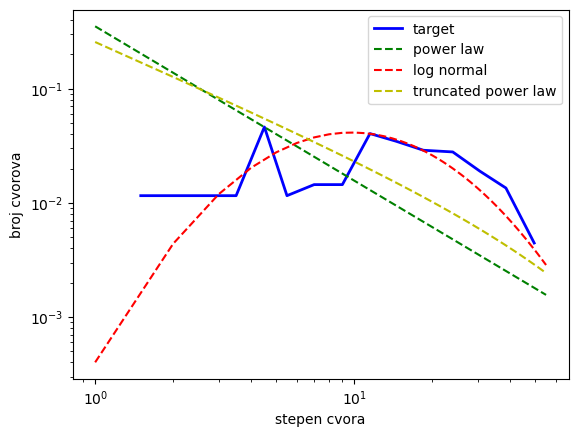

In [60]:
import powerlaw
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
results = powerlaw.Fit(degree_sequence)

fit=powerlaw.Fit(degree_sequence,xmin=1)
fig2 = fit.plot_pdf(color='b', linewidth=2, label='target')
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2, label='power law')
fit.lognormal.plot_pdf(color='r', linestyle='--', ax=fig2, label='log normal')
fit.truncated_power_law.plot_pdf(color='y', linestyle='--', ax=fig2, label='truncated power law')
fig2.legend()
plt.xlabel('stepen cvora')
plt.ylabel('broj cvorova')
print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")

#fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
##fit.plot_pdf( color= 'b')
#plt.figure(figsize=(10, 6))
#fig2 = fit.plot_pdf(color='b', linewidth=2)
#fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
#fit.distribution_compare('power_law', 'lognormal')
##fig4 = fit.plot_ccdf(linewidth=3, color='black')
#fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
#fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
#fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--')

In [101]:
#print(nx.sigma(G, niter=10, nrand=5, seed=None))

KeyboardInterrupt: 

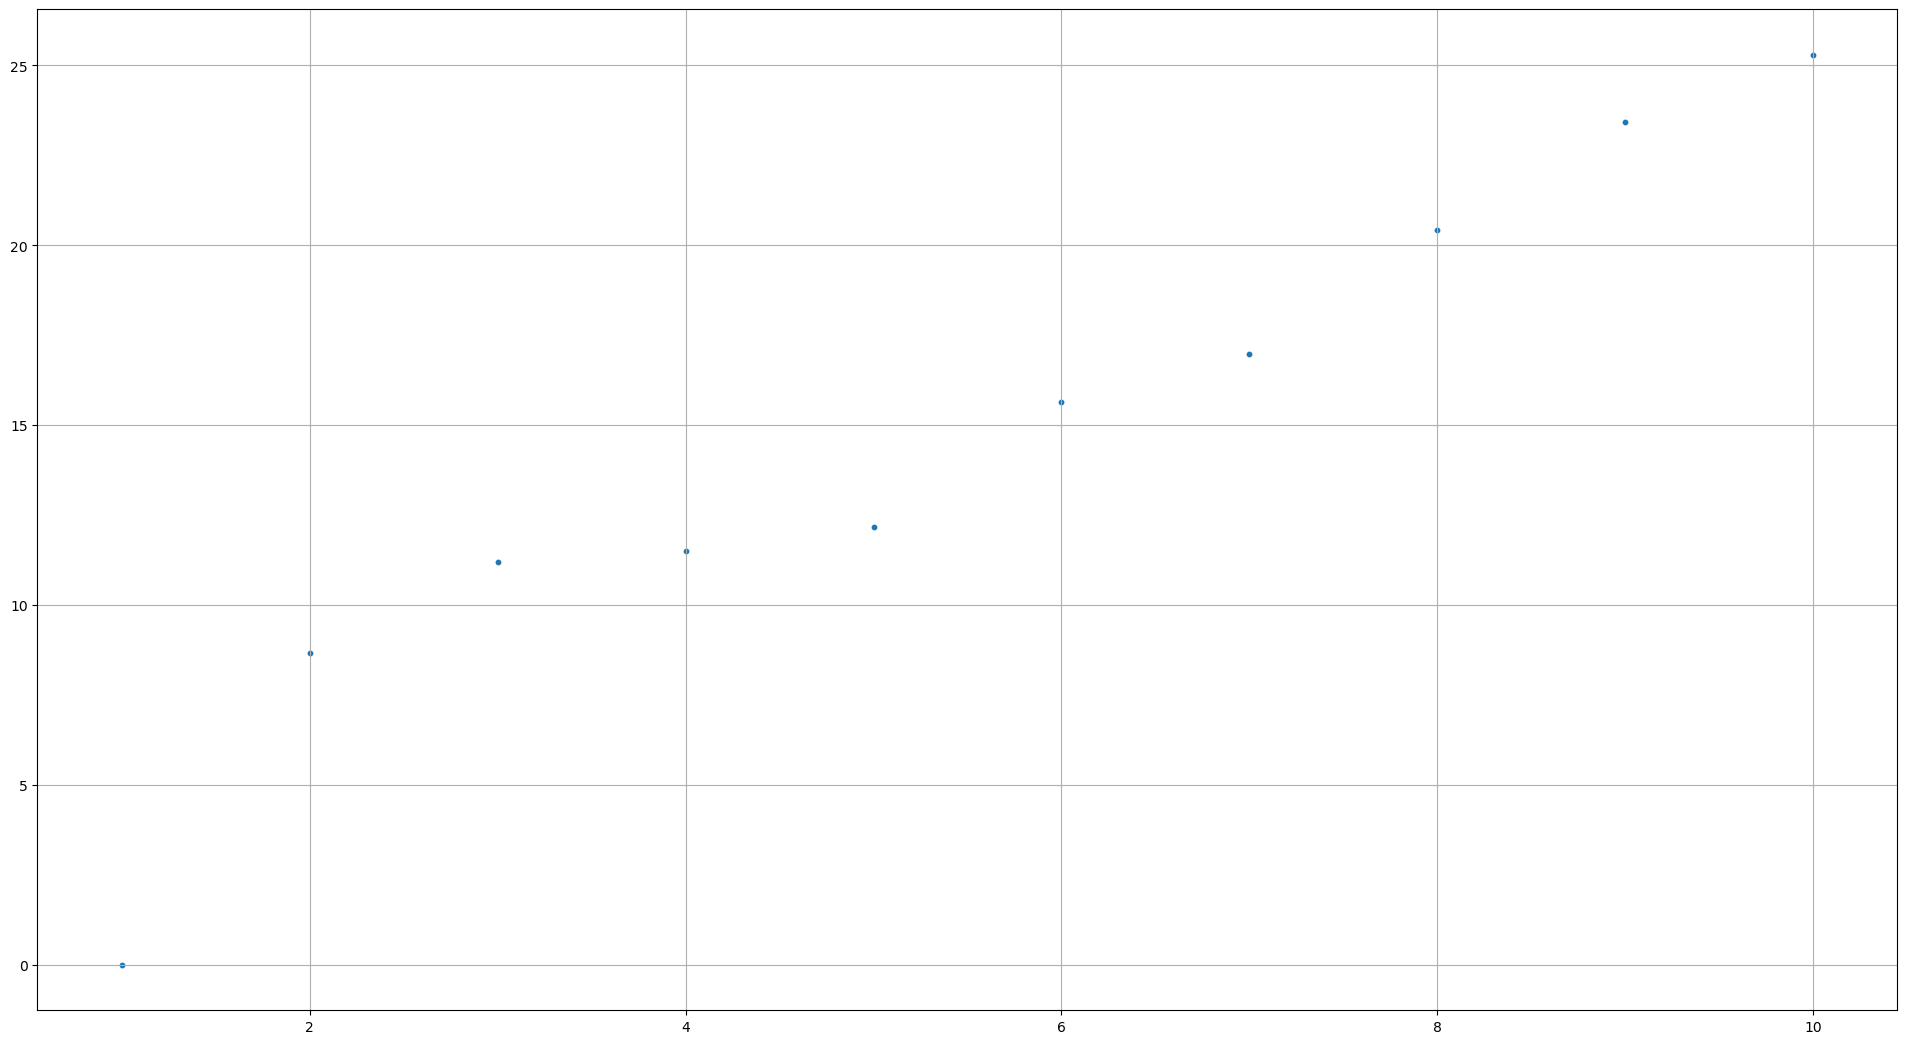

In [79]:
#Laplasijan matrica
L = nx.laplacian_matrix(G.to_undirected(),weight='weight').toarray()
#pronalazenje sopstevnih vrednosit i sopstvenih vektora
l, v = np.linalg.eig(L)
x_axis = np.arange(l.shape[0])+1

sort = np.argsort(l)
l = l[sort]
v = v[:, sort]
plt.grid('on')
plt.scatter(x_axis[:10], l[:10],s = 10)

In [80]:
k = 5
vk = v[:,:k]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k).fit(vk)
nodes= list(G.nodes)
for i in range(len(kmeans.labels_)):
              G.nodes[nodes[i]]['spektralniKlaster']=kmeans.labels_[i]


In [83]:

def plot_and_save_dendrogram(G):

    plt.rcParams["figure.figsize"] = (24,13)
    # get Girvan-Newman communities list
    communities = list(nx.community.girvan_newman(G))

    # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

    # turning this dictionary to the desired format in @mdml's answer
    node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
    for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
        for node_id_parent, group in init_node2community_dict.items():
            if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                node_id_to_children[node_id_parent].append(node_id1)
                node_id_to_children[node_id_parent].append(node_id2)

    # also recording node_labels dict for the correct label for dendrogram leaves
    node_labels = dict()
    for node_id, group in init_node2community_dict.items():
        if len(group) == 1:
            node_labels[node_id] = G.nodes(node_id)['name']
        else:
            node_labels[node_id] = ''

    # also needing a subset to rank dict to later know within all k-length merges which came first
    subset_rank_dict = dict()
    rank = 0
    for e in communities[::-1]:
        for p in list(e):
            if tuple(p) not in subset_rank_dict:
                subset_rank_dict[tuple(sorted(p))] = rank
                rank += 1
    subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

    # my function to get a merge height so that it is unique (probably not that efficient)
    def get_merge_height(sub):
        sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
        n = len(sub_tuple)
        other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
        min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
        range = (max_rank-min_rank) if max_rank > min_rank else 1
        return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

    # finally using @mdml's magic, slightly modified:
    G           = nx.DiGraph(node_id_to_children)
    nodes       = G.nodes()
    leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
    inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

    # Compute the size of each subtree
    subtree = dict( (n, [n]) for n in leaves )
    for u in inner_nodes:
        children = set()
        node_list = list(node_id_to_children[u])
        while len(node_list) > 0:
            v = node_list.pop(0)
            children.add( v )
            node_list += node_id_to_children[v]
        subtree[u] = sorted(children & leaves)

    inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

    # Construct the linkage matrix
    leaves = sorted(leaves)
    index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
    Z = []
    k = len(leaves)
    for i, n in enumerate(inner_nodes):
        children = node_id_to_children[n]
        x = children[0]
        for y in children[1:]:
            z = tuple(sorted(subtree[x] + subtree[y]))
            i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
            Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
            index[z] = k
            subtree[z] = list(z)
            x = z
            k += 1

    # dendrogram
    plt.figure()
    dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
    plt.savefig('dendrogram.png')

In [70]:

# ekstrakcija dominantne komponente
import itertools
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
G2=G.to_undirected()
largest_cc = max(nx.connected_components(G2), key=len)
S = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
Gdom = G2.subgraph(largest_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} čvorova i {len(Gdom.edges())} grana")
#G = Gdom

Dominantna komponenta ima 173 čvorova i 1833 grana


In [84]:
plot_and_save_dendrogram(Gdom)

KeyError: 'name'

In [81]:
#print(G.edges)
#list_stops = set(dataStops['stop_id'].unique())
output_path = 'models/directed_c_graph.gexf'

nx.write_gexf(G, output_path)
#print(list_stops)